In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
import numpy as np

2025-11-06 15:25:00.153969: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
DATA_DIR = '../data/asl_alphabet_train/asl_alphabet_train'
TEST_DATA_DIR = '../data/asl_alphabet_test/asl_alphabet_test'

IMAGE_SIZE = (96, 96) 
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2
SEED = 123

In [3]:
print("Creating Training Dataset...")

train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=VALIDATION_SPLIT,
    subset="training",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

print("Creating Validation Dataset...")

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=VALIDATION_SPLIT,
    subset="validation",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

print("Creating Test Dataset...")

class_names = train_ds.class_names
print(f"Found {len(class_names)} classes: {class_names}")

Creating Training Dataset...
Found 87000 files belonging to 29 classes.
Using 69600 files for training.


2025-11-06 15:25:06.894928: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-11-06 15:25:06.895438: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-11-06 15:25:06.895460: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.88 GB
2025-11-06 15:25:06.896162: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-06 15:25:06.896236: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Creating Validation Dataset...
Found 87000 files belonging to 29 classes.
Using 17400 files for validation.
Creating Test Dataset...
Found 29 classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [4]:
print("Defining augmentation and normalization layers...")

data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomTranslation(0.1, 0.1),
        layers.RandomContrast(0.1),
    ],
    name="data_augmentation"
)

normalization_layer = layers.Rescaling(1./255) 

Defining augmentation and normalization layers...


In [5]:
print("Applying processing and optimizing datasets...")

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=tf.data.AUTOTUNE)

val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=tf.data.AUTOTUNE)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("Data processing pipeline complete and optimized.")

Applying processing and optimizing datasets...
Data processing pipeline complete and optimized.


Displaying augmented training batch...


2025-11-06 15:25:11.311097: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_21' with dtype resource
	 [[{{node Placeholder/_21}}]]
2025-11-06 15:25:11.311519: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_23' with dtype resource
	 [[{{node Placeholder/_23}}]]
2025-11-06 15:25:11.408820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-11-06 15:25:11.726208: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected tru

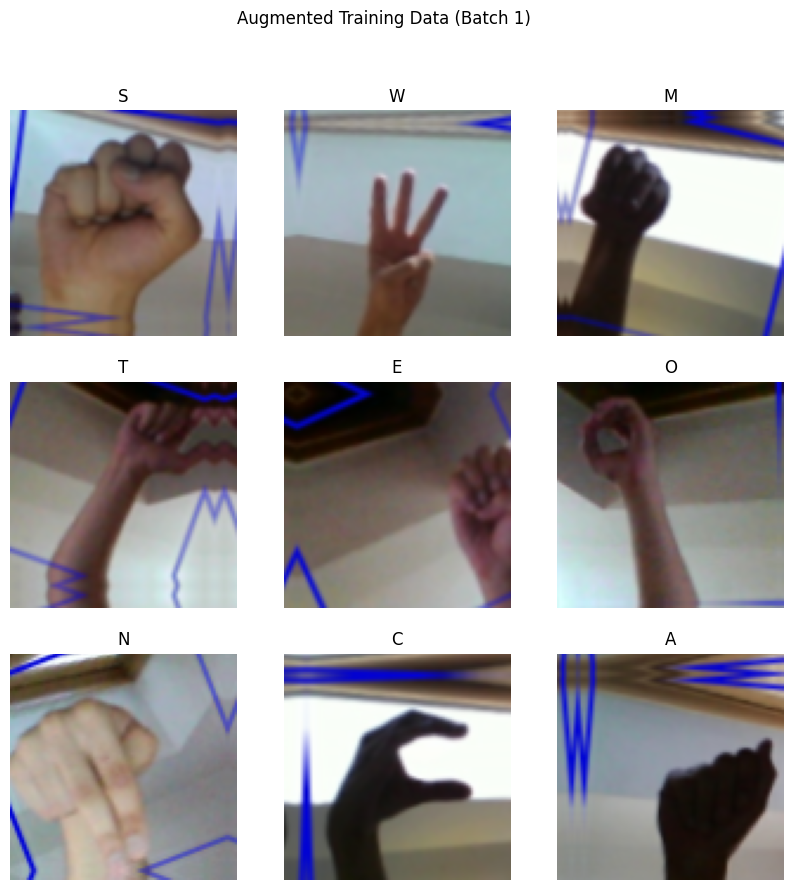

Displaying un-augmented validation batch...


2025-11-06 15:25:12.349489: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [17400]
	 [[{{node Placeholder/_4}}]]
2025-11-06 15:25:12.349772: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [17400]
	 [[{{node Placeholder/_4}}]]
2025-11-06 15:25:12.452446: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pip

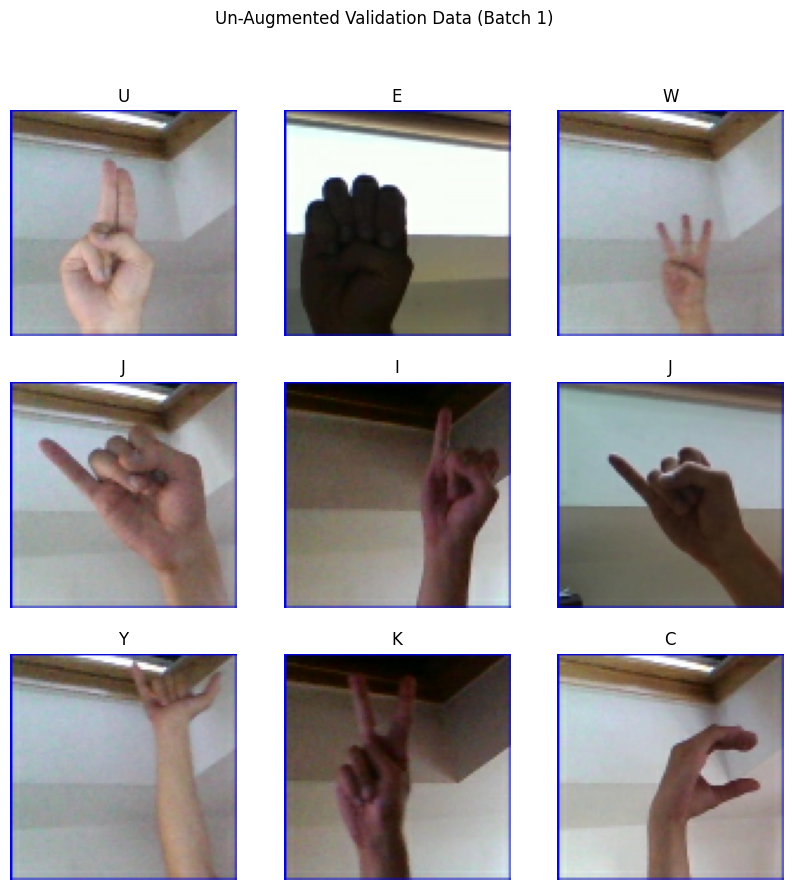

In [6]:
print("Displaying augmented training batch...")

for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    plt.suptitle("Augmented Training Data (Batch 1)")
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy()) 
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    plt.show()

print("Displaying un-augmented validation batch...")

for images, labels in val_ds.take(1):
    plt.figure(figsize=(10, 10))
    plt.suptitle("Un-Augmented Validation Data (Batch 1)")
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    plt.show()